In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("train.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Summary of the Data

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone on board, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

# Column Descriptions

- `survival` - Survival, 0 = No, 1 = Yes

- `pclass` - Ticket class, 1 = 1st, 2 = 2nd, 3 = 3rd

- `sex` - Sex

- `Age` - Age in years

- `sibsp` - No. of siblings/spouse abroad the titanic

- `parch` - No. of parent/children abroad the titanic

- `ticket` - Ticket number

- `fare` - Passesnger fare

- `cabin` - Cabin number

- `embarked` - Port of Embarkation, C = Cherbourg, Q = Queenstown, S = Southampton

# Additional Information

The data has been split into two groups:

- training set (train.csv)
- test set (test.csv)

**The training set** should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class. You can also use feature engineering to create new features.

**The test set** should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.

In [4]:
# export data for manual assessment

titanic = pd.concat([df, pd.read_csv('test.csv')], ignore_index=True)
titanic.to_excel('titanic.xlsx')

### Issues with the dataset

1. Dirty Data
    - **name** - has some passenger name inside brackets row # 1,3,8,9,15,18,...,66 `accuracy`
    - **name** - has some passenger name in double quotes row # 22, 28,...165, `accuracy`
    - row # 101,146,148,161,186,...,556 name column contian name in both brackets and quotes `accuracy`
    - **name** row # 906 starts from small letter `consistency`
    - **name** row # 910,924,926,943,995,999,1035,... missed the quotes `accuracy`
    - **Age** has some missing values `completeness`
    - **Cabin** has some missing values `completeness`
    - **Embarked** has some missing values `completeness`


2. Messy Data

In [5]:
df.sample()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
395,396,0,3,"Johansson, Mr. Erik",male,22.0,0,0,350052,7.7958,NaN,S


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.duplicated().sum()

0

In [8]:
df[["Age","Fare"]].describe()

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


In [9]:
df[df['Age'] == 0.420000]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
803,804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C


In [10]:
titanic[titanic['Ticket'] == '2625']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
803,804,1.0,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C
995,996,NaN,3,"Thomas, Mrs. Alexander (Thamine Thelma"")""",female,16.00,1,1,2625,8.5167,NaN,C


### Column Types

- **Numerical** - Age, Fare, PassengerId
- **Categorical** - Survived, Pclass, Sex, SibSp, Parch, Embarked
- **Mixed** - Name, Ticket, Cabin

### Univariate Analysis
<hr/>

### Age

**conclusions**

- Age is normally(almost) distributed
- 20% data is missing
- There is some outliers

In [11]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

<AxesSubplot: ylabel='Frequency'>

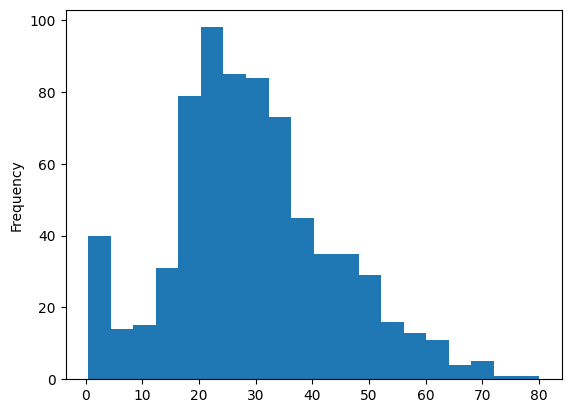

In [12]:
df['Age'].plot(kind='hist', bins=20)

<AxesSubplot: ylabel='Density'>

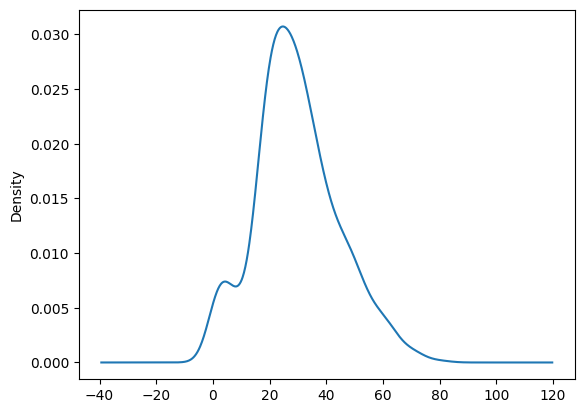

In [13]:
df['Age'].plot(kind='kde')

In [14]:
df['Age'].skew()

0.38910778230082704

<AxesSubplot: >

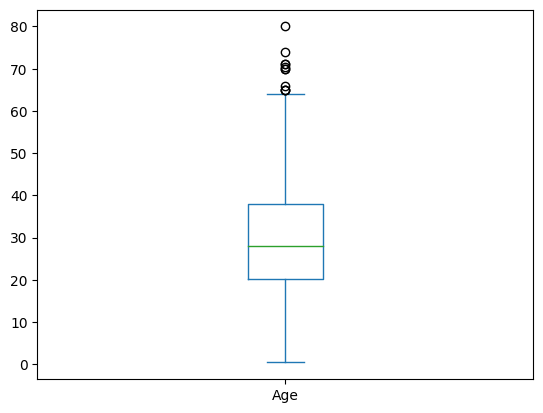

In [15]:
df['Age'].plot(kind='box')

In [16]:
df[df['Age'] > 65]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
672,673,0,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,C.A. 24580,10.5000,NaN,S
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000,B22,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S


In [17]:
df['Age'].isnull().sum() / len(df['Age'])

0.19865319865319866

### Fare

**conclusions**

- Data is heighly(positevly) skewed
- Fare col actually contains the group fare not the individual fare(this might be an issue)
- We need to create a new col called individual_fare

In [18]:
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

<AxesSubplot: ylabel='Frequency'>

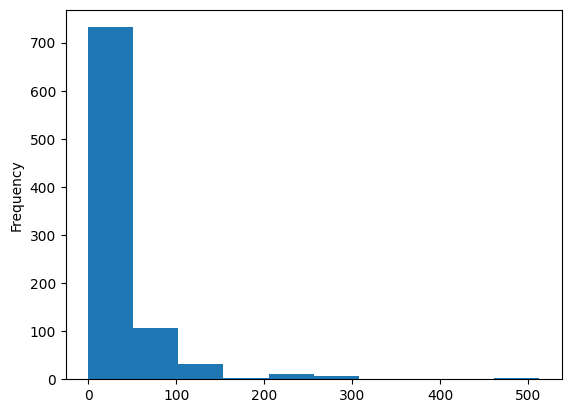

In [19]:
df['Fare'].plot(kind='hist')

<AxesSubplot: ylabel='Density'>

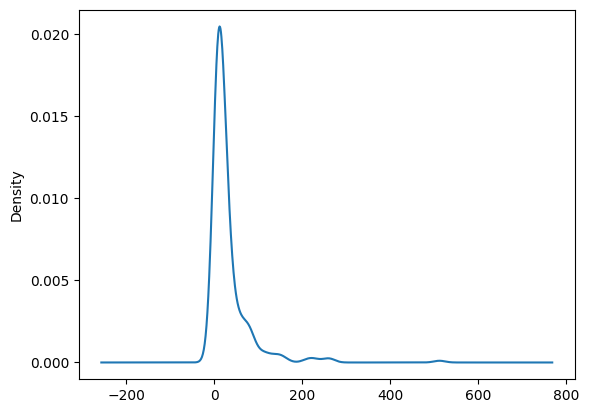

In [20]:
df['Fare'].plot(kind='kde')

In [21]:
df['Fare'].skew()

4.787316519674893

<AxesSubplot: >

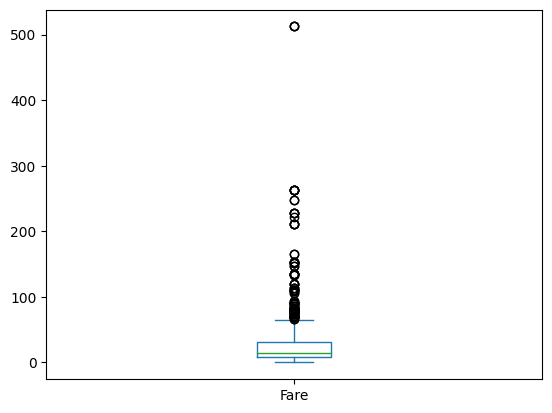

In [22]:
df['Fare'].plot(kind='box')

In [23]:
df[df['Fare'] > 250]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,C23 C25 C27,S
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
742,743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C


In [24]:
df['Fare'].isnull().sum()

0

### Survived

In [25]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

<AxesSubplot: >

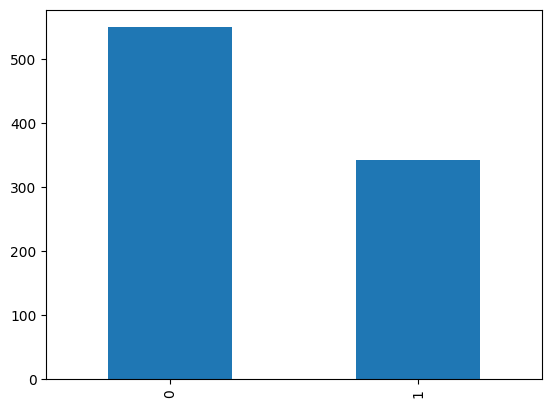

In [26]:
df['Survived'].value_counts().plot(kind='bar')

<AxesSubplot: ylabel='Survived'>

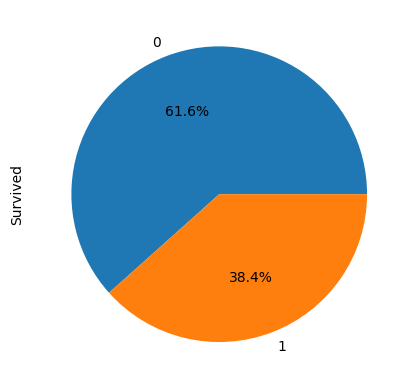

In [27]:
df['Survived'].value_counts().plot(kind='pie', autopct='%0.1f%%')

In [28]:
df['Survived'].isnull().sum()

0

### Pclass

**conslusions**

- Surprisingly less peaple travelled in Pclass 2 and more peaple travelled in Pclass 3 
- `Age * Class` - Since age and class are both numbers we can just multiply them.

In [29]:
df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

<AxesSubplot: >

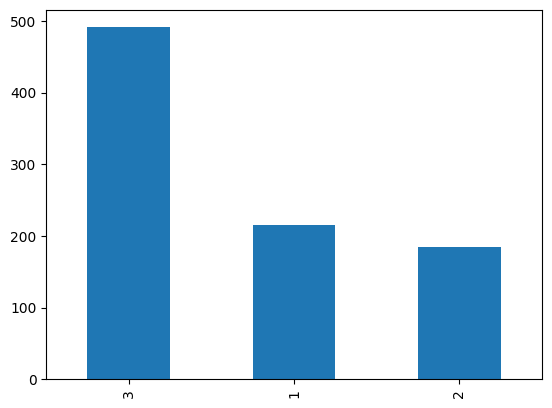

In [30]:
df['Pclass'].value_counts().plot(kind='bar')

<AxesSubplot: ylabel='Pclass'>

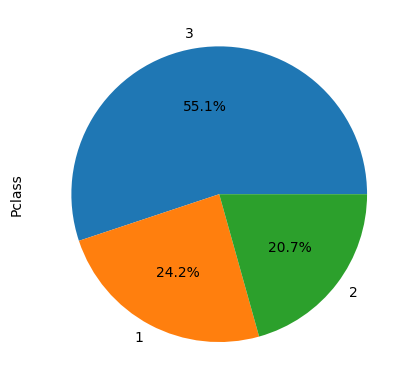

In [31]:
df['Pclass'].value_counts().plot(kind='pie', autopct='%0.1f%%')

In [32]:
df['Pclass'].isnull().sum()

0

### Sex

In [33]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

<AxesSubplot: >

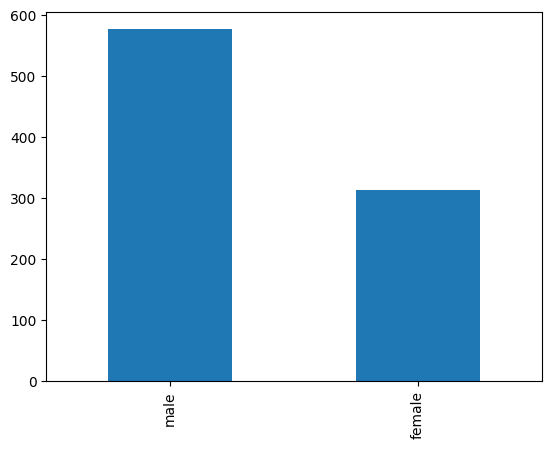

In [34]:
df['Sex'].value_counts().plot(kind='bar')

<AxesSubplot: ylabel='Sex'>

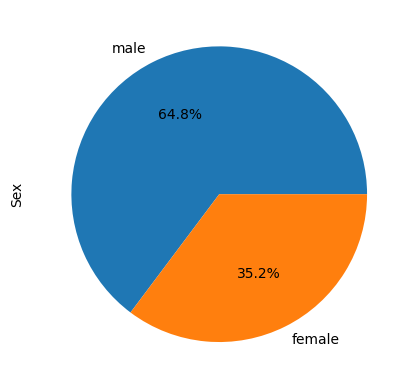

In [35]:
df['Sex'].value_counts().plot(kind='pie', autopct='%0.1f%%')

In [36]:
df['Sex'].isnull().sum()

0

### SibSp

In [37]:
df['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

<AxesSubplot: >

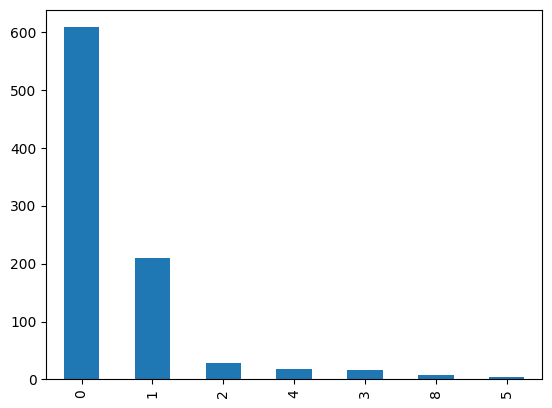

In [38]:
df['SibSp'].value_counts().plot(kind='bar')

<AxesSubplot: ylabel='SibSp'>

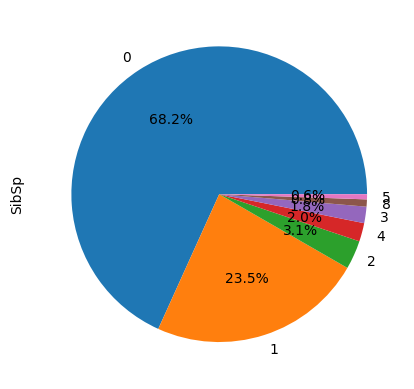

In [39]:
df['SibSp'].value_counts().plot(kind='pie', autopct='%0.1f%%')

In [40]:
df['SibSp'].isnull().sum()

0

### Parch

**conclusions**

- Parch and SibSp cols can be merged to form a new col called family_size
- Create a new col called is_alone

In [41]:
df['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

<AxesSubplot: >

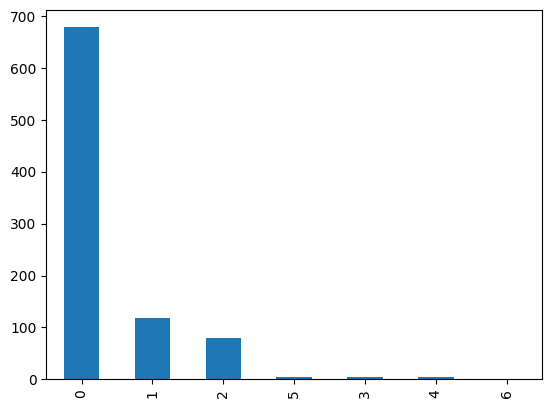

In [42]:
df['Parch'].value_counts().plot(kind='bar')

<AxesSubplot: ylabel='Parch'>

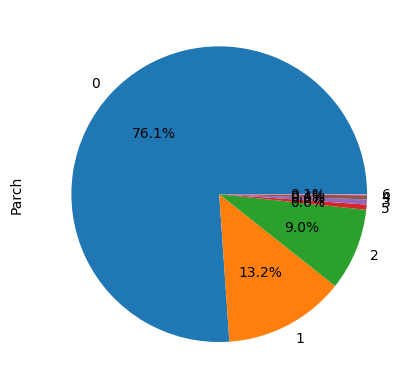

In [43]:
df['Parch'].value_counts().plot(kind='pie', autopct='%0.1f%%')

In [44]:
df['Parch'].isnull().sum()

0

### Embarked

**conclusions**

- Has some missing values

In [45]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

<AxesSubplot: >

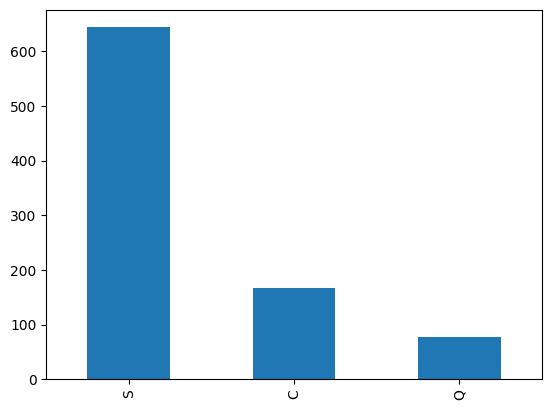

In [46]:
df['Embarked'].value_counts().plot(kind='bar')

<AxesSubplot: ylabel='Embarked'>

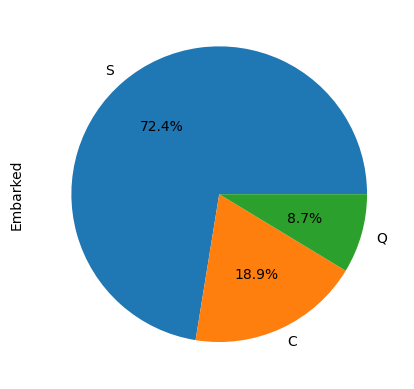

In [47]:
df['Embarked'].value_counts().plot(kind='pie', autopct='%0.1f%%')

In [48]:
df['Embarked'].isnull().sum()

2

### Bivariate Analysis
<hr/>

### Survived vs Pclass

**conclusions**

- More peaple died travelling in Pclass 3

In [49]:
pd.crosstab(df['Survived'], df['Pclass'], normalize='columns')*100

Pclass,1,2,3
Survived,,,
0,37.037037,52.717391,75.763747
1,62.962963,47.282609,24.236253


<AxesSubplot: xlabel='Pclass', ylabel='Survived'>

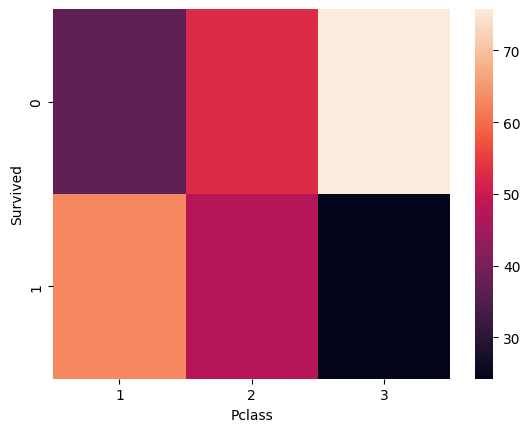

In [50]:
sns.heatmap(pd.crosstab(df['Survived'], df['Pclass'], normalize='columns')*100)

### Survived vs Sex

**conclusion**

- Chance of surviving females are higher than males

In [51]:
pd.crosstab(df['Survived'], df['Sex'], normalize='columns')*100

Sex,female,male
Survived,,
0,25.796178,81.109185
1,74.203822,18.890815


### Survived vs Embarked

**conclusion**

- More peaple from Cherbourg survived becouse generally they were in 1st class

In [52]:
pd.crosstab(df['Survived'], df['Embarked'], normalize='columns')*100

Embarked,C,Q,S
Survived,,,
0,44.642857,61.038961,66.304348
1,55.357143,38.961039,33.695652


In [53]:
pd.crosstab(df['Pclass'], df['Embarked'], normalize='columns')*100

Embarked,C,Q,S
Pclass,,,
1,50.595238,2.597403,19.720497
2,10.119048,3.896104,25.465839
3,39.285714,93.506494,54.813665


### Survived vs Age

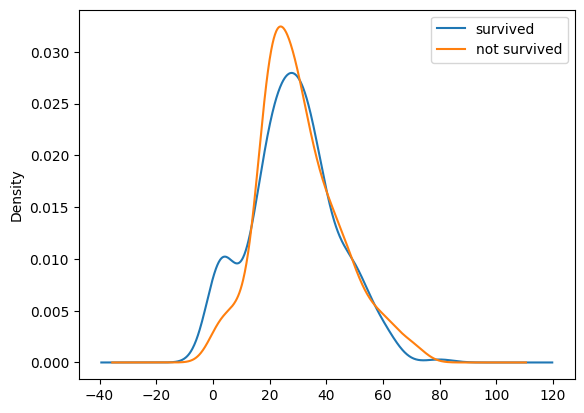

In [54]:
df[df['Survived'] == 1]['Age'].plot(kind='kde', label='survived')
df[df['Survived'] == 0]['Age'].plot(kind='kde', label='not survived')

plt.legend()
plt.show()

In [55]:
df[df['Pclass'] == 1]['Age'].mean()

38.233440860215055

### Feature Engineering on Fare col

In [56]:
df['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [57]:
df[df['Ticket'] == 'CA. 2343']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [58]:
df[df['Name'].str.contains('Sage')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
641,642,1,1,"Sagesser, Mlle. Emma",female,24.0,0,0,PC 17477,69.30,B35,C
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [59]:
df1 = pd.read_csv('test.csv')

In [60]:
df = pd.concat([df, df1])

In [61]:
df[df['Ticket'] == 'CA. 2343']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
159,160,0.0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0.0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0.0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0.0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
792,793,0.0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0.0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0.0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S
188,1080,NaN,3,"Sage, Miss. Ada",female,NaN,8,2,CA. 2343,69.55,NaN,S
342,1234,NaN,3,"Sage, Mr. John George",male,NaN,1,9,CA. 2343,69.55,NaN,S
360,1252,NaN,3,"Sage, Master. William Henry",male,14.5,8,2,CA. 2343,69.55,NaN,S


In [62]:
df['individual_fare'] = df['Fare']/(df['SibSp'] + df['Parch'] + 1)

<AxesSubplot: >

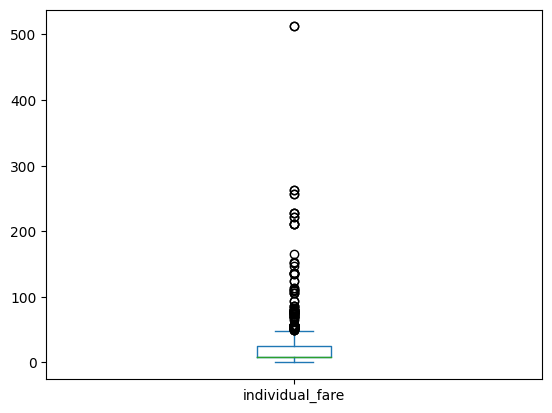

In [63]:
df['individual_fare'].plot(kind='box')

In [64]:
df[['individual_fare', 'Fare']].describe()

,individual_fare,Fare
count,1308.000000,1308.000000
mean,20.518215,33.295479
std,35.774337,51.758668
min,0.000000,0.000000
25%,7.452767,7.895800
50%,8.512483,14.454200
75%,24.237500,31.275000
max,512.329200,512.329200


### On SibSp and Parch

In [65]:
df['family_size'] = df['SibSp'] + df['Parch'] + 1

In [66]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,individual_fare,family_size
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,3.62500,2
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,35.64165,2
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,7.92500,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,26.55000,2
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,8.05000,1


In [67]:
# family_type

# 1 --> alone
# 2 - 4 --> small
# >5 --> large

def transform_family_size(number):
    if number == 1:
        return "alone"
    elif number > 1 and number < 5:
        return "small"
    else:
        return "large"

In [68]:
df['family_type'] = df['family_size'].apply(transform_family_size)

In [69]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,individual_fare,family_size,family_type
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,3.62500,2,small
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,35.64165,2,small
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,7.92500,1,alone
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,26.55000,2,small
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,8.05000,1,alone


In [70]:
pd.crosstab(df['Survived'], df['family_type'], normalize='columns')*100

family_type,alone,large,small
Survived,,,
0.0,69.646182,83.870968,42.123288
1.0,30.353818,16.129032,57.876712


### Feature Engineering on Name

In [71]:
df['surname'] = df['Name'].str.split(',').str.get(0)

In [72]:
df['title'] = df['Name'].str.split(',').str.get(1).str.strip().str.split(' ').str.get(0)

In [73]:
df['title'].value_counts()

Mr.          757
Miss.        260
Mrs.         197
Master.       61
Rev.           8
Dr.            8
Col.           4
Mlle.          2
Major.         2
Ms.            2
Lady.          1
Sir.           1
Mme.           1
Don.           1
Capt.          1
the            1
Jonkheer.      1
Dona.          1
Name: title, dtype: int64

In [74]:
df['title'] = df['title'].str.replace('Rev.', 'other')
df['title'] = df['title'].str.replace('Dr.', 'other')
df['title'] = df['title'].str.replace('Col.', 'other')
df['title'] = df['title'].str.replace('Major.', 'other')
df['title'] = df['title'].str.replace('Don.', 'other')
df['title'] = df['title'].str.replace('Capt.', 'other')
df['title'] = df['title'].str.replace('the', 'other')
df['title'] = df['title'].str.replace('Jonkheer.', 'other')

df['title'] = df['title'].str.replace('Dona.', 'Mrs.')

C:\Users\Acer\AppData\Local\Temp\ipykernel_8452\2929063075.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['title'] = df['title'].str.replace('Rev.', 'other')
C:\Users\Acer\AppData\Local\Temp\ipykernel_8452\2929063075.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['title'] = df['title'].str.replace('Dr.', 'other')
C:\Users\Acer\AppData\Local\Temp\ipykernel_8452\2929063075.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['title'] = df['title'].str.replace('Col.', 'other')
C:\Users\Acer\AppData\Local\Temp\ipykernel_8452\2929063075.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df['title'] = df['title'].str.replace('Major.', 'other')
C:\Users\Acer\AppData\Local\Temp\ipykernel_8452\2929063075.py:5: FutureWarning: The default value of regex will change from True to Fal

In [75]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,individual_fare,family_size,family_type,surname,title
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,3.62500,2,small,Braund,Mr.
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,35.64165,2,small,Cumings,Mrs.
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,7.92500,1,alone,Heikkinen,Miss.
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,26.55000,2,small,Futrelle,Mrs.
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,8.05000,1,alone,Allen,Mr.


In [76]:
temp_df = df[df['title'].isin(['Mr.', 'Miss.', 'Mrs.', 'Master.', 'ootherr'])]

In [77]:
pd.crosstab(temp_df['Survived'], temp_df['title'], normalize='columns')*100

title,Master.,Miss.,Mr.,Mrs.,ootherr
Survived,,,,,
0.0,42.5,30.21978,84.332689,20.8,73.684211
1.0,57.5,69.78022,15.667311,79.2,26.315789


### On Cabin

In [78]:
df['Cabin'].isnull().sum() / len(df['Cabin'])

0.774637127578304

In [79]:
df['Cabin'].fillna('M', inplace=True)

In [80]:
df['Cabin'].value_counts().head(15)

M                  1014
C23 C25 C27           6
B57 B59 B63 B66       5
G6                    5
F33                   4
D                     4
C78                   4
B96 B98               4
F4                    4
F2                    4
C22 C26               4
E34                   3
B51 B53 B55           3
E101                  3
A34                   3
Name: Cabin, dtype: int64

In [81]:
df['deck'] = df['Cabin'].str[0]

In [82]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,individual_fare,family_size,family_type,surname,title,deck
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,M,S,3.62500,2,small,Braund,Mr.,M
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,35.64165,2,small,Cumings,Mrs.,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,M,S,7.92500,1,alone,Heikkinen,Miss.,M
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,26.55000,2,small,Futrelle,Mrs.,C
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,M,S,8.05000,1,alone,Allen,Mr.,M


In [83]:
df['deck'].value_counts()

M    1014
C      94
B      65
D      46
E      41
A      22
F      21
G       5
T       1
Name: deck, dtype: int64

In [84]:
pd.crosstab(df['deck'], df['Pclass'])

Pclass,1,2,3
deck,,,
A,22,0,0
B,65,0,0
C,94,0,0
D,40,6,0
E,34,4,3
F,0,13,8
G,0,0,5
M,67,254,693
T,1,0,0


<AxesSubplot: xlabel='deck'>

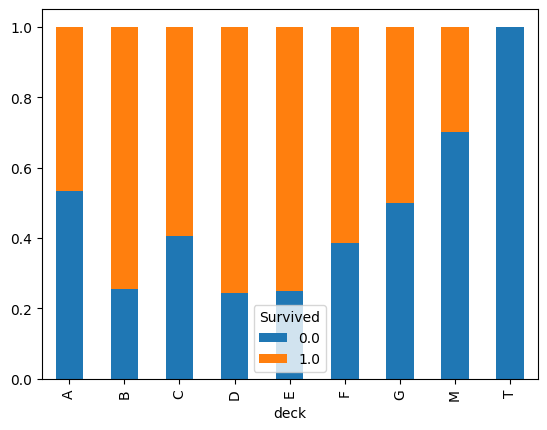

In [85]:
pd.crosstab(df['deck'], df['Survived'], normalize='index').plot(kind='bar', stacked=True)